In [1]:
!pip install pandas numpy matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Load dataset
df = pd.read_csv("/home/sargam/Downloads/StudentsPerformance.csv")

In [5]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0           44.0  
4                    none        76.0           78.0           75.0  


In [6]:
# ✅ 1. Handling missing values
print("Missing values before:\n", df.isnull().sum())

Missing values before:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     9
reading_score                  5
writing_score                  6
dtype: int64


In [7]:
# Fill missing numeric scores with their respective column means
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].mean())
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].mean())


In [8]:
print("\nMissing values after:\n", df.isnull().sum())


Missing values after:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [9]:
# ✅ 2. Outlier Detection using IQR
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers count: {outliers.shape[0]}")
    return outliers


In [10]:
print("\n--- Outlier Detection ---")
detect_outliers("math_score")
detect_outliers("reading_score")
detect_outliers("writing_score")


--- Outlier Detection ---
math_score → Outliers count: 8
reading_score → Outliers count: 8
writing_score → Outliers count: 5


,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
76,male,group E,some high school,standard,none,30.0,26.0,22.0
327,male,group A,some college,free/reduced,none,28.0,23.0,19.0
596,male,group B,high school,free/reduced,none,30.0,24.0,15.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


<Axes: >

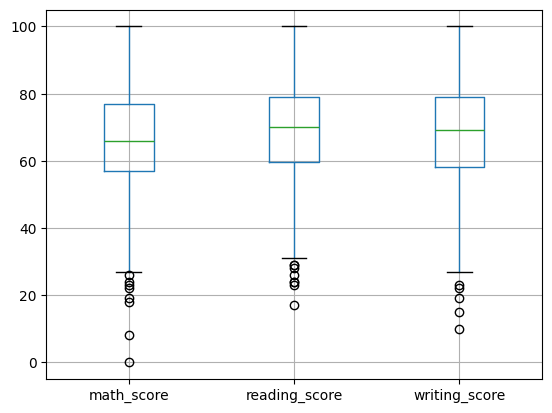

In [11]:
col = ['math_score','reading_score','writing_score']
df.boxplot(col)

In [12]:
print(np.where(df['math_score']>90))
print(np.where(df['reading_score']<25))
print(np.where(df['writing_score']<30))

(array([ 34, 104, 114, 121, 149, 165, 171, 179, 233, 263, 286, 306, 451,
       458, 469, 501, 503, 521, 539, 546, 562, 566, 571, 594, 612, 618,
       623, 625, 685, 689, 710, 712, 717, 719, 736, 779, 784, 815, 846,
       855, 864, 886, 903, 916, 919, 934, 950, 957, 962, 979]),)
(array([ 59, 327, 596, 980]),)
(array([ 17,  59,  76, 211, 327, 338, 596, 896, 980]),)


In [13]:
df['placement_score'] = df[['math_score','reading_score','writing_score']].mean(axis=1)
df.loc[df['test_preparation_course'] == 'completed','placement_score'] += 5

In [14]:
df['placement_offer_count'] = df['placement_score'].apply(lambda x: 3 if x > 85 else (2 if x > 70 else 1))

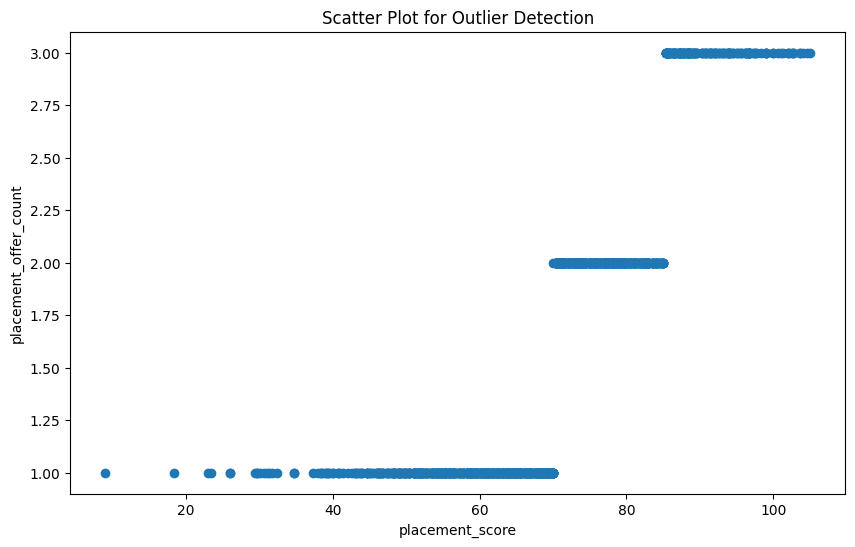

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['placement_score'], df['placement_offer_count'])
ax.set_xlabel('placement_score')
ax.set_ylabel('placement_offer_count')
plt.title("Scatter Plot for Outlier Detection")
plt.show()

In [16]:
print(np.where((df['placement_score']<50) & (df['placement_offer_count']>1)))
print(np.where((df['placement_score']>85) & (df['placement_offer_count']<3)))

(array([], dtype=int64),)
(array([], dtype=int64),)


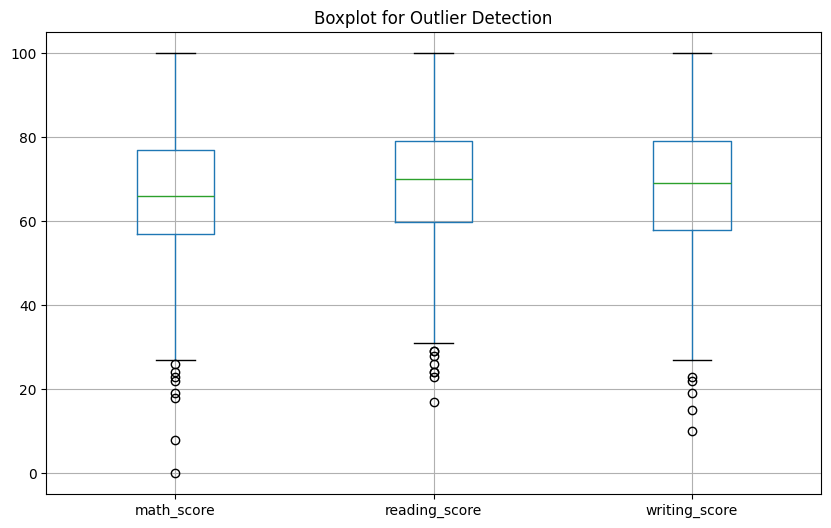

In [17]:
plt.figure(figsize=(10,6))
df.boxplot(column=['math_score','reading_score','writing_score'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [18]:
z_scores = np.abs(stats.zscore(df[['math_score', 'reading_score','writing_score']]))
threshold = 3
outliers_z = np.where(z_scores > threshold)
print("Outliers based on Z-Score:", outliers_z)

Outliers based on Z-Score: (array([ 17,  59,  59,  59,  76, 327, 327, 596, 596, 787, 980, 980]), array([0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1]))


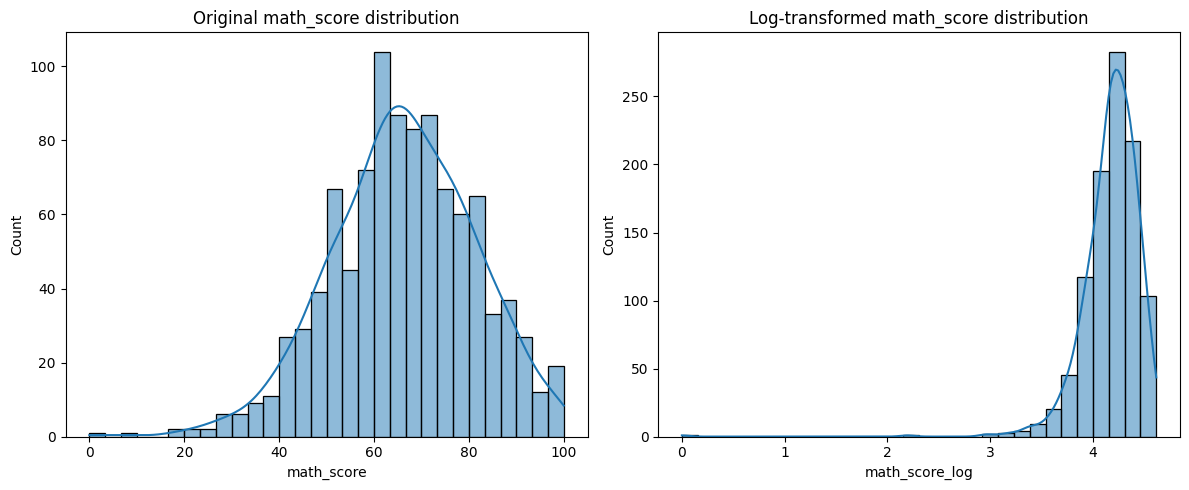

In [20]:
# ✅ 3. Data Transformation
# Apply log transformation to reduce skewness of math_score
df['math_score_log'] = np.log1p(df['math_score'])

# Plot before/after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['math_score'], kde=True, bins=30)
plt.title("Original math_score distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['math_score_log'], kde=True, bins=30)
plt.title("Log-transformed math_score distribution")

plt.tight_layout()
plt.show()

In [21]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']


In [22]:
df['average_score'] = df['total_score'] / 3


In [23]:
df['performance'] = pd.cut(df['average_score'], bins=[0, 50, 70, 85, 100],
                           labels=["Poor", "Average", "Good", "Excellent"])


In [24]:
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,placement_score,placement_offer_count,math_score_log,total_score,average_score,performance
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,72.666667,2,4.290459,218.0,72.666667,Good
1,female,group C,some college,standard,completed,69.0,90.0,88.0,87.333333,3,4.248495,247.0,82.333333,Good
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,92.666667,3,4.510860,278.0,92.666667,Excellent
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,49.333333,1,3.871201,148.0,49.333333,Poor
4,male,group C,some college,standard,none,76.0,78.0,75.0,76.333333,2,4.343805,229.0,76.333333,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,99.000000,3,4.488636,282.0,94.000000,Excellent
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,57.333333,1,4.143135,172.0,57.333333,Average
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,70.000000,1,4.094345,195.0,65.000000,Average
998,female,group D,some college,standard,completed,68.0,78.0,77.0,79.333333,2,4.234107,223.0,74.333333,Good


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['math_score_scaled', 'reading_score_scaled', 'writing_score_scaled']] = scaler.fit_transform(df[['math_score', 'reading_score', 'writing_score']])
